In [1]:
from src.preproces import Preprocess_Climate_Data, Handle_Files
from src.Data_viz import Plotter

## Investigate data folder

The Handle_Files class is self written for this investigation. It contains the ability to write to directory and open from custom paths. We start by creating a file_handler and get all file names from data directory.

In [2]:
folder_path = '/nird/projects/NS9188K/bjornhs/ACCESS-ESM1-5/'

file_handler = Handle_Files()
print(f' working directory: {file_handler.working_dir}')
file_names = file_handler.get_all_filenames_in_dir(folder_path)
file_names

 working directory: /nird/home/johannef/FYS-STK4155_Project_3


['pr_day_ACCESS-ESM1-5_ssp126_r33i1p1f1_gn_20150101-21001231.nc',
 'pr_day_ACCESS-ESM1-5_ssp370_r37i1p1f1_gn_20150101-21001231.nc',
 'tas_day_ACCESS-ESM1-5_ssp585_r27i1p1f1_gn_20150101-21001231.nc',
 'tas_day_ACCESS-ESM1-5_ssp370_r15i1p1f1_gn_20150101-21001231.nc',
 'pr_day_ACCESS-ESM1-5_ssp585_r21i1p1f1_gn_20150101-21001231.nc',
 'tas_day_ACCESS-ESM1-5_ssp370_r21i1p1f1_gn_20150101-21001231.nc',
 'pr_day_ACCESS-ESM1-5_ssp585_r39i1p1f1_gn_20150101-21001231.nc',
 'pr_day_ACCESS-ESM1-5_ssp245_r28i1p1f1_gn_20150101-21001231.nc',
 'pr_day_ACCESS-ESM1-5_ssp245_r13i1p1f1_gn_20150101-21001231.nc',
 'tas_day_ACCESS-ESM1-5_ssp585_r38i1p1f1_gn_20150101-21001231.nc',
 'tas_day_ACCESS-ESM1-5_ssp245_r4i1p1f1_gn_20150101-21001231.nc',
 'pr_day_ACCESS-ESM1-5_ssp370_r12i1p1f1_gn_20150101-21001231.nc',
 'tas_day_ACCESS-ESM1-5_ssp585_r30i1p1f1_gn_20150101-21001231.nc',
 'tas_day_ACCESS-ESM1-5_ssp370_r39i1p1f1_gn_20150101-21001231.nc',
 'pr_day_ACCESS-ESM1-5_ssp585_r16i1p1f1_gn_20150101-21001231.nc',
 'pr

## example of how we can open and preproces files is shown bellow

In [6]:
example_file1 = file_handler.read_netcdf_to_xr(directory=folder_path, file_name='pr_day_ACCESS-ESM1-5_ssp585_r10i1p1f1_gn_20150101-23001231.nc')
example_file2 = file_handler.read_netcdf_to_xr(directory=folder_path, file_name='pr_day_ACCESS-ESM1-5_ssp245_r22i1p1f1_gn_20150101-21001231.nc')


example_file1

/nird/home/johannef/.conda/envs/ML_env/lib/python3.11/site-packages/xarray/coding/times.py:832: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/nird/home/johannef/.conda/envs/ML_env/lib/python3.11/site-packages/xarray/coding/times.py:832: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/nird/home/johannef/.conda/envs/ML_env/lib/python3.11/site-packages/xarray/core/indexing.py:560: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()


<xarray.Dataset>
Dimensions:    (time: 104459, bnds: 2, lon: 192, lat: 145)
Coordinates:
  * time       (time) object 2015-01-01 12:00:00 ... 2300-12-31 12:00:00
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.9 (https://mpi...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    ...                     ...
    variant_label:          r10i1p1f1
    version:                v20200908
    license:                CMIP6 model data produced by CSIRO is licensed un...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/4b42fd87-7f45-489b-87e3-c4c275c04db6
    CDO:                    Climate Data Operators version 1.9.9 (https://mpi...

We can now create a preprocesser, which we will use to create global anual climatologies, per file this is done by:
1. Open as xarray file (as above)
2. Create spatial climatology: global mean 
3. Create temporal climatology: annual mean 
4. Save to new xarray file for further work

In [4]:
preprocesser = Preprocess_Climate_Data()

In [12]:
global_mean_example_file1 = preprocesser.create_spatial_climatology(dataset=tas_file, 
                                                                    var_name='tas',
                                                                    climatology_type='global',
                                                                    save_to_dataset=False)

global_mean_example_file1

<xarray.Dataset>
Dimensions:  (time: 31411)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
    height   float64 ...
Data variables:
    tas      (time) float32 278.2 278.5 278.6 278.5 ... 284.4 284.3 284.2 284.1

In [9]:
annual_global_mean_example_file1 = preprocesser.create_temporal_climatology(global_mean_example_file1, 
                                                                           var_name='pr',
                                                                           climatology_type='yearly',
                                                                           save_to_dataset=False)
annual_global_mean_example_file2 = preprocesser.create_temporal_climatology(global_mean_example_file2, 
                                                                           var_name='pr',
                                                                           climatology_type='yearly',
                                                                           save_to_dataset=False)
len(annual_global_mean_example_file1.pr)

286

In [7]:
annual_global_mean_example_file = preprocesser.save_climatology_dataset(dataset=annual_global_mean_example_file1, 
                                                                        climatology_type='annual_global', 
                                                                        file_name= 'example_file', 
                                                                        directory=None, 
                                                                        is_original_name=True)
annual_global_mean_example_file

<xarray.Dataset>
Dimensions:  (year: 286)
Coordinates:
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2296 2297 2298 2299 2300
Data variables:
    pr       (year) float32 3.073e-05 3.087e-05 ... 3.784e-05 3.775e-05


<xarray.Dataset>
Dimensions:  (year: 286)
Coordinates:
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2296 2297 2298 2299 2300
Data variables:
    pr       (year) float32 ...

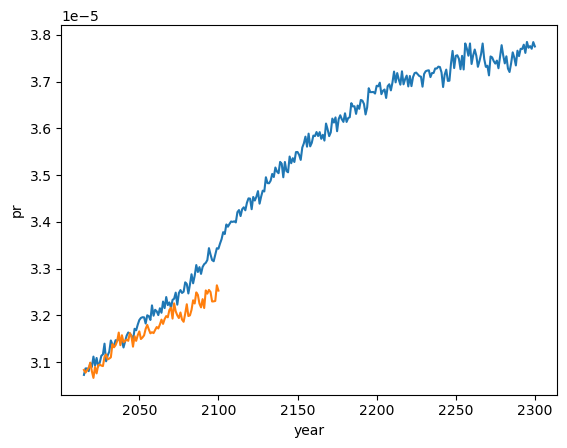

In [11]:
annual_global_mean_example_file1.pr.plot()
annual_global_mean_example_file2.pr.plot()

An alternative to this process is to use the full version *preprocesser.create_spatial_temporal_climatology()*
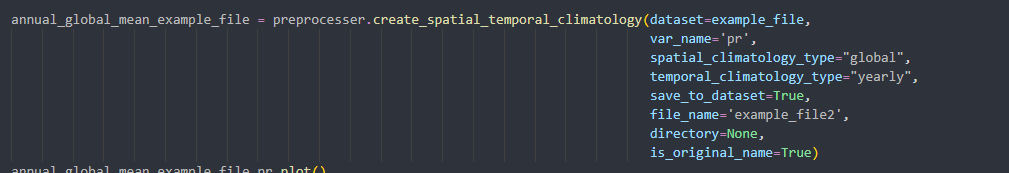

which will have the same outcome, condensing 2.-4. from the outline above.

## Bulk processing and ensamble means

In [24]:
from collections import Counter

In order to further investigate the data we need to performe the above skript in bulk. Since we have different datasets with different measurments we will start by sorting the files.

There are different groupings that we will devide by, to explain I will use the name of the example file:
*tas_day_ACCESS-ESM1-5_ssp585_r30i1p1f1_gn_20150101-21001231.nc*

- *ACCESS-ESM1-5*: is the model name. In this folder we have two models, ACCESS-ESM1-5 (320 files) and ACCESS-CM2 (6 files). Since the latter is so few samples we will ignor it for now and only use ACCESS-ESM1-5 files.
- *tas*: denotes the variable, this is temperature surface, but our data include both tas and pr which denotes percepitation. We have 160 datasets per variable.
- *day*: denotes the resolution of the dataset. The daily timesteps are to small (to much noise for our purpose) and therefore we downscale to monthly resolution. In the climate models we use *Amon* for this resolution.
- *ssp585*: denotes the sosieconomic pathway, or data include: 80 samples of ssp126, ssp245, ssp370, ssp585
- *r30i1p1f1*: denotes the ensamble member and simulation
- *20150101-21001231*: is the simulation period. as we can see from the plot above some pathways are simulated until 2300 and some are simulated until 2100. 


Get all models

In [25]:
measured_strings = [name.split('_')[2] for name in file_names]
measured_strings_count = Counter(measured_strings)
measured_strings_count

Counter({'ACCESS-ESM1-5': 320, 'ACCESS-CM2': 6})

In [11]:
ACCESS_CM2_files = [name for name in file_names if 'ACCESS-CM2' in name]
ACCESS_CM2_files

['pr_day_ACCESS-CM2_ssp585_r2i1p1f1_gn_20150101-21001231.nc',
 'pr_day_ACCESS-CM2_ssp585_r3i1p1f1_gn_20150101-21001231.nc',
 'pr_day_ACCESS-CM2_ssp585_r5i1p1f1_gn_20150101-21001231.nc',
 'pr_day_ACCESS-CM2_ssp126_r1i1p1f1_gn_22510101-23001231.nc',
 'pr_day_ACCESS-CM2_ssp585_r4i1p1f1_gn_20150101-21001231.nc',
 'pr_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_20150101-23001231.nc']

In [26]:
ACCESS_ESM1_5_files = [name for name in file_names if 'ACCESS-ESM1-5' in name]

Get all measures included in the folder

In [27]:
measured_strings = [name.split('_')[0] for name in ACCESS_ESM1_5_files]
measured_strings_count = Counter(measured_strings)
measured_strings_count

Counter({'pr': 160, 'tas': 160})

Get all scenarios:

In [13]:
measured_strings = [name.split('_')[3] for name in ACCESS_ESM1_5_files]
measured_strings_count = Counter(measured_strings)
measured_strings_count

Counter({'ssp126': 80, 'ssp370': 80, 'ssp585': 80, 'ssp245': 80})

### Sort by model, measure and scenario

In [28]:
ACCESS_ESM1_5_tas_files = []
ACCESS_ESM1_5_pr_files = []

for file in ACCESS_ESM1_5_files:
    variable = file.split('_')[0]
    if variable == 'tas':
        ACCESS_ESM1_5_tas_files.append(file)
    elif variable == 'pr':
        ACCESS_ESM1_5_pr_files.append(file)

ACCESS_ESM1_5_tas_files.sort()
ACCESS_ESM1_5_pr_files.sort()
print(f'Number of tas files: {len(ACCESS_ESM1_5_tas_files)}')
print(f'Number of pr files: {len(ACCESS_ESM1_5_pr_files)}')

Number of tas files: 160
Number of pr files: 160


In [29]:
import pandas as pd

sorted_files = {'tas': {}, 'pr': {}}

for var, file_list in zip(['tas', 'pr'], 
                         [ACCESS_ESM1_5_tas_files, ACCESS_ESM1_5_pr_files]):
    for file in file_list:
        scenario = file.split('_')[3]
        if scenario not in sorted_files[var]:
            sorted_files[var][scenario] = []
        sorted_files[var][scenario].append(file)

# Create a DataFrame from the sorted_files dictionary
df = pd.DataFrame(sorted_files)
# Count the number of files in each cell
df = df.map(lambda x: len(x) if isinstance(x, list) else 0)
# Display the DataFrame
df

,tas,pr
ssp126,40,40
ssp245,40,40
ssp370,40,40
ssp585,40,40


Now we need to do the global and monthly climatology for each of the files. For this process I refeer to *"Bulk preproces.py"* because the jupyter book did not have enoug alocated memory on my remote connection. 